In [2]:
import numpy as np
import scipy as sp
import scipy.special
import scipy.integrate
import matplotlib.pyplot as plt

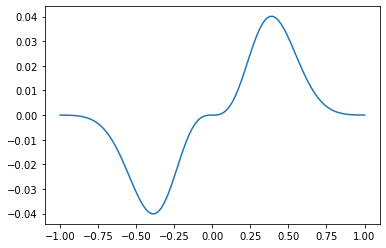

In [54]:
def f(x):
    # the function's interval must be [-1, 1]
    # return ((16 * x)**2 - 25)**2 / 4
    # return np.sin(np.pi * x)
    # return np.sin((np.pi * x)**2)
    # return np.sin(np.exp(-1 * x**2))
    # return np.sin(np.exp(-10 * x**2))
    # return np.sin(np.exp(-50 * x**2))
    return np.sin(np.exp(-10 * x**2)) * np.sin((np.pi * x))

xvec = np.linspace(-1, 1, 100)
ftru = f(xvec)
plt.plot(xvec, ftru)
plt.show()

In [45]:
n = 10

def theta(k):
    return (k - 0.5) * np.pi / (n + 1)

def g(k):
    return f(np.cos(theta(k)))

kvec = np.arange(1, n + 2)
print(kvec)
nvec = np.arange(0, n + 1)
print(nvec)

cvec = 2 / (n + 1) * np.sum(g(kvec) * np.cos(nvec[..., np.newaxis] * theta(kvec)), axis=1)

print(cvec.shape)
print(cvec)

[ 1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10]
(11,)
[ 7.14400678e-17  4.57793704e-02 -8.06792337e-17 -1.12562689e-01
  1.19271980e-16  1.26401246e-01 -1.47177134e-16 -9.69908985e-02
  1.34645070e-16  4.96518733e-02 -1.21814137e-16]


In [46]:
# npcvec = np.polynomial.chebyshev.chebinterpolate(f, n)
# print(npcvec.shape)
# print(npcvec)

(11,)
(100,)


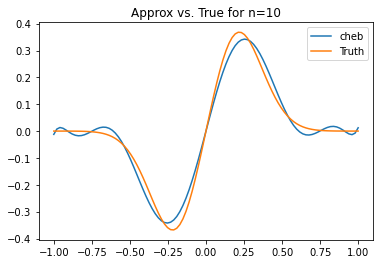

Error:  0.03748095606540439


In [47]:
T = sp.special.eval_chebyt(nvec, xvec[0])
print(T.shape)

def cheb2x(x):
    rtn = np.zeros_like(x)
    for i in range(len(x)):
        chebvec = sp.special.eval_chebyt(nvec, x[i])
        chebvec[0] = chebvec[0] * 0.5
        chebvec[-1] = chebvec[-1] * 0.5
        rtn[i] = cvec @ chebvec
    return rtn

print(cheb2x(xvec).shape)

plt.plot(xvec, cheb2x(xvec), label='cheb')
plt.plot(xvec, ftru, label='Truth')
plt.title('Approx vs. True for n=10')
plt.legend()
plt.show()

def intgrd(x):
    chebvec = sp.special.eval_chebyt(nvec, x)
    chebvec[0] = chebvec[0] * 0.5
    chebvec[-1] = chebvec[-1] * 0.5
    fhat = cvec @ chebvec
    return (fhat - f(x))**2

print('Error: ', np.sqrt(sp.integrate.quad(intgrd, -1, 1, )[0]))

Error(n=2): 0.2601432591212446, Error(n=3): 0.21149591115480865, Error(n=4): 0.2431400711729013, Error(n=5): 0.15681038727442853, Error(n=6): 0.1681328377891474, Error(n=7): 0.08861684049732346, Error(n=8): 0.08871343758494965, Error(n=9): 0.04107718081534049, Error(n=10): 0.03748095606540439, Error(n=11): 0.016177904648987038, Error(n=12): 0.01199011773234791, Error(n=13): 0.0058444380005425005, Error(n=14): 0.003197085648566373, Error(n=15): 0.0029845528216977334, Error(n=16): 0.0026522474429865935, Error(n=17): 0.0020827542926005155, Error(n=18): 0.0021704132372213913, Error(n=19): 0.001343848734010454, Error(n=20): 0.0013956316456950433, Error(n=21): 0.0007682690598330929, Error(n=22): 0.0007755892680888452, Error(n=23): 0.00039754350361745605, Error(n=24): 0.0003881369100773657, Error(n=25): 0.00018882374361586386, Error(n=26): 0.00017742795812390115, Error(n=27): 8.256140780103672e-05, Error(n=28): 7.424471400715389e-05, Error(n=29): 3.273592728331496e-05, Error(n=30): 2.64263543

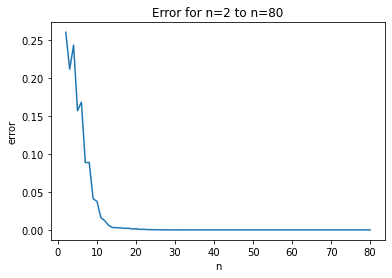

In [50]:
def errintgrd(x, nn):
    def ttheta(k):
        return (k - 0.5) * np.pi / (nn + 1)

    def gg(k):
        return f(np.cos(ttheta(k)))

    kkvec = np.arange(1, nn + 2)
    nnvec = np.arange(0, nn + 1)
    ccvec = 2 / (nn + 1) * np.sum(gg(kkvec) * np.cos(nnvec[..., np.newaxis] * ttheta(kkvec)), axis=1)

    chebsvec = sp.special.eval_chebyt(nnvec, x)
    chebsvec[0] = chebsvec[0] * 0.5
    chebsvec[-1] = chebsvec[-1] * 0.5

    ffhat = ccvec @ chebsvec
    return (ffhat - f(x))**2

error = []

stop = 80

for thisn in range(2, stop + 1):
    thiserror = np.sqrt(sp.integrate.quad(errintgrd, -1, 1, args=(thisn))[0])
    print(f'Error(n={thisn}):', thiserror, end=', ')
    error.append(thiserror)

plt.plot(range(2, stop + 1), error)
plt.xlabel('n')
plt.ylabel('error')
plt.title(f'Error for n=2 to n={stop}')
plt.show()